In [70]:
from sympy import *
x, y = symbols("x y")
f1 = x**3 - 3 * x * y**2 - 1
f2 = 3 * y * x**2 - y**3
jac = Matrix([[diff(f1, x), diff(f2, x)], [diff(f1, y), diff(f2, y)]])
jac

Matrix([
[3*x**2 - 3*y**2,           6*x*y],
[         -6*x*y, 3*x**2 - 3*y**2]])

In [73]:
import numpy as np
def FdF20_1(f, X):
    x1,x2,x3 = symbols("x1 x2 x3")
    f = Lambda((x1, x2, x3), np.array([[x1 + x2 + x3], [x1**2 + x2**2 + x3**2 - 2], [x1 * (x2 + x3) + 1]]))

    jac = Lambda((x1,x2,x3), np.array([[diff(f(x1,x2,x3)[0], x1), diff(f(x1,x2,x3)[0], x2), diff(f(x1,x2,x3)[0], x3)], 
                                       [diff(f(x1,x2,x3)[1], x1), diff(f(x1,x2,x3)[1], x2), diff(f(x1,x2,x3)[1], x3)],
                                       [diff(f(x1,x2,x3)[2], x1), diff(f(x1,x2,x3)[2], x2), diff(f(x1,x2,x3)[2], x3)]]).reshape(-1, 3))

    return np.array(f(X[0], X[1], X[2]), dtype=('float64')), np.array(jac(X[0], X[1], X[2]), dtype=('float64'))

FdF20_1([1,2,3])

(array([[ 6.],
        [12.],
        [ 6.]]),
 array([[1., 1., 1.],
        [2., 4., 6.],
        [5., 1., 1.]]))

In [78]:
def newt_sys(FdF20, x0, itter):
    x = x0.copy()
    estimate = [x.copy()]
    
    for _ in range(itter):
        f, df = FdF20(x)
        h = np.linalg.solve(df, -f).flatten()
        x += h
        estimate.append(x.copy())
    return estimate

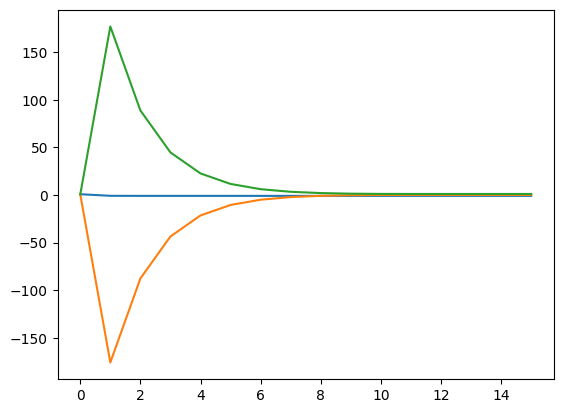

In [83]:
import matplotlib.pyplot as plt
x0 = np.array([3/4, 1/2, 1/2 + 0.01])
plt.plot(newt_sys(FdF20_1, x0, 15))
plt.show()

In [ ]:
def FdF20_1(f, X):
    x1,x2,x3 = symbols("x1 x2 x3")
    f = Lambda((x1, x2, x3), np.array([[3 * x1 + 12 * x2 + 10 * x3 - 72.3], 
                                       [12 * x1 + 0 * x2 + 20 * x3 - 99.5], 
                                       [0 * x1 + 2 * x2 + 30 * x3 - 56.6]]))

    jac = Lambda((x1,x2,x3), np.array([[diff(f(x1,x2,x3)[0], x1), diff(f(x1,x2,x3)[0], x2), diff(f(x1,x2,x3)[0], x3)], 
                                       [diff(f(x1,x2,x3)[1], x1), diff(f(x1,x2,x3)[1], x2), diff(f(x1,x2,x3)[1], x3)],
                                       [diff(f(x1,x2,x3)[2], x1), diff(f(x1,x2,x3)[2], x2), diff(f(x1,x2,x3)[2], x3)]]).reshape(-1, 3))

    return np.array(f(X[0], X[1], X[2]), dtype=('float64')), np.array(jac(X[0], X[1], X[2]), dtype=('float64'))



In [86]:
X = np.array([[3, 12, 10],
          [12, 0, 20],
          [0, 2, 30]])

b = np.array([72.3, 99.5, 56.6])
b_hat = np.array([73.3, 98.4, 57.1])

np.linalg.solve(X,b) - np.linalg.solve(X,b_hat)

array([ 0.10809524, -0.10214286, -0.00985714])

In [126]:
from time import perf_counter
def get_mat(dim): 
    A = np.random.rand(dim, dim)
    b = np.random.rand(dim, 1)
    return A, b

def func_timer(dim):
    A, b = get_mat(dim)

    solve_beg = perf_counter()
    np.linalg.solve(A, b)
    solve_end = perf_counter()

    inv_beg = perf_counter()
    np.linalg.inv(A)*b
    inv_end = perf_counter()

    det_beg = perf_counter()
    for i in range(len(A)):
        ai = A.copy()
        ai.T[i] = b.T
        np.linalg.det(ai) / np.linalg.det(A)
    det_end = perf_counter()

    print(f"Solve: {solve_end - solve_beg}, \tInv: {inv_end - inv_beg}, \tDET: {det_end - det_beg}, \tdim = {dim}")

for dim in [100, 200, 400, 800]:
    func_timer(dim)

Solve: 0.122411700000157, 	Inv: 0.018696000001000357, 	DET: 0.4227537000006123, 	dim = 100
Solve: 0.002284700000018347, 	Inv: 0.00258399999984249, 	DET: 1.6128769999995711, 	dim = 200
Solve: 0.03871389999949315, 	Inv: 0.006994299999860232, 	DET: 6.731355699999767, 	dim = 400


c:\Users\eskeh\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\linalg\linalg.py:2154: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)
C:\Users\eskeh\AppData\Local\Temp/ipykernel_5868/3614457785.py:22: RuntimeWarning: invalid value encountered in double_scalars
  np.linalg.det(ai) / np.linalg.det(A)


Solve: 0.013319499999852269, 	Inv: 0.02332330000172078, 	DET: 25.800113299999794, 	dim = 800


In [3]:
import scipy.linalg as lin
import numpy as np

A = np.array([[2,1,1],[1,2,-1],[1,-1,3]])
P, L, U = lin.lu(A)
L, U

(array([[ 1. ,  0. ,  0. ],
        [ 0.5,  1. ,  0. ],
        [ 0.5, -1. ,  1. ]]),
 array([[ 2. ,  1. ,  1. ],
        [ 0. ,  1.5, -1.5],
        [ 0. ,  0. ,  1. ]]))

In [8]:
LU, D, _ = lin.ldl(A)
LU, D

(array([[ 1. ,  0. ,  0. ],
        [ 0.5,  1. ,  0. ],
        [ 0.5, -1. ,  1. ]]),
 array([[2. , 0. , 0. ],
        [0. , 1.5, 0. ],
        [0. , 0. , 1. ]]))

In [24]:
L_tilde = U.T
U_tilde = L.T

np.matmul(L_tilde, U_tilde)


array([[ 2.,  1.,  1.],
       [ 1.,  2., -1.],
       [ 1., -1.,  3.]])

In [26]:
L_tildetilde = np.matmul(L, np.sqrt(D))
L_tildetilde

array([[ 1.41421356,  0.        ,  0.        ],
       [ 0.70710678,  1.22474487,  0.        ],
       [ 0.70710678, -1.22474487,  1.        ]])

In [32]:
A = np.array([[3,12,10],[12,0,20],[0,2,30]])
b = np.array([72.3, 99.5, 56.6])
b_tilde = np.array([73.3, 98.4, 57.1])

x = np.linalg.solve(A,b)
x_tilde = np.linalg.solve(A,b_tilde)

b_err = np.linalg.norm(b_tilde - b) / np.linalg.norm(b)
x_err = np.linalg.norm(x_tilde - x) / np.linalg.norm(x)

b_err, x_err

(0.011584393206309853, 0.022535951701327005)

In [35]:
kond = np.linalg.cond(A)

kond * b_err, x_err

(0.045271404333397845, 0.022535951701327005)

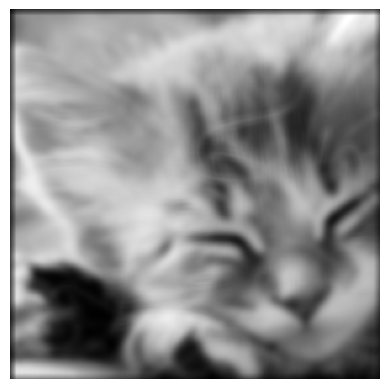

In [52]:
import scipy
import matplotlib.pyplot as plt
data = scipy.io.loadmat("deblur.mat")
A, B = data['A'], data['B']
plt.imshow(B, cmap='gray')
plt.axis('off')
plt.show()

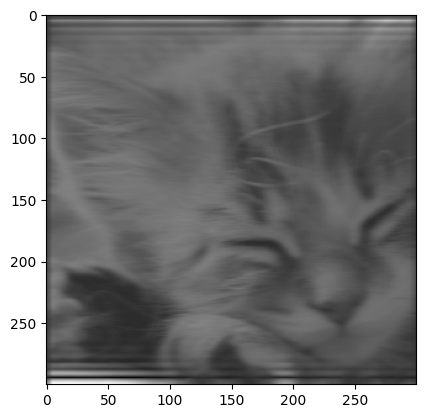

In [62]:
U = np.linalg.cholesky(A)
X = np.linalg.inv(U) @ np.linalg.inv(U.T) @ B
plt.imshow(X, cmap='gray')
plt.show()

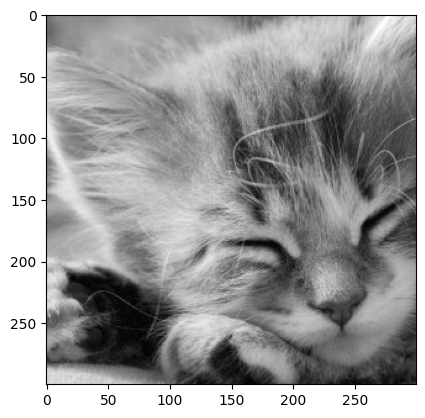

In [104]:
A_inv = np.linalg.inv(A)
X = A_inv @ B @ A_inv
plt.imshow(X, cmap='gray')

In [90]:
upper_cond = np.linalg.norm(B) * 0.02 / (np.linalg.cond(A)**2)

In [107]:
err = np.random.normal(0, 1, (300, 300))
err = err * upper_cond / np.linalg.norm(err)

In [110]:
x_tilde = A_inv @ (B + err) @ A_inv

np.linalg.norm(x_tilde - X) / np.linalg.norm(X)

0.003161091611284654

In [2]:
from sympy import *
Matrix([[1,4,5],[2,3,6],[3,0,1]]).rref()[0]

Matrix([
[1, 0, 0],
[0, 1, 0],
[0, 0, 1]])